In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

In [3]:
path = '/content/drive/MyDrive/Datasets/Cat_Dog_Horse_Human_Dataset/'

In [4]:
print(os.listdir(path))

['cats', 'horses', 'dogs', 'humans']


In [5]:
for i in os.listdir(path):
    print(i, len(os.listdir(path + i)))

cats 181
horses 181
dogs 181
humans 181


In [6]:
import keras
import keras.utils as image
import matplotlib.pyplot as plt

In [7]:
from keras.preprocessing.image import ImageDataGenerator

In [8]:
train_X = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 10,
    width_shift_range = 0.3,
    height_shift_range = 0.3,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True ,
    vertical_flip = True
)

In [9]:
train_gen = train_X.flow_from_directory(path,
                                        target_size = (250, 250),
                                        batch_size = 50,
                                        class_mode = 'categorical')

Found 724 images belonging to 4 classes.


In [10]:
print(type(train_gen))

<class 'keras.src.preprocessing.image.DirectoryIterator'>


In [11]:
for i, j in train_gen:
    print(i.shape, j.shape)
    break

(50, 250, 250, 3) (50, 4)


In [12]:
j[0]

array([0., 0., 1., 0.], dtype=float32)

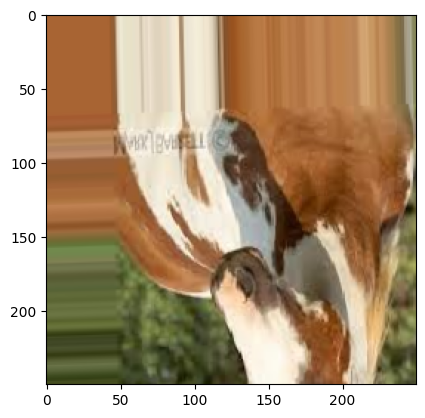

In [13]:
plt.imshow(i[0])

In [14]:
from keras.applications.resnet50 import ResNet50
# from keras.preprocessing import image
from keras.applications.resnet50 import decode_predictions, preprocess_input

In [15]:
model_resent = ResNet50(weights = 'imagenet', include_top = False)

In [16]:
model_resent.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [17]:
# for i, layer in enumerate(model_resent.layers):
#   if (i == 45):
#     output_model = layer
#   # layer.trainable = True

In [18]:
for layer in model_resent.layers:
  layer.trainable = True

In [19]:
output_model = model_resent.output
output_model = keras.layers.GlobalAveragePooling2D()(output_model)
output_model = keras.layers.Dense(1024, activation = 'relu')(output_model)
output_model = keras.layers.Dense(512, activation = 'relu')(output_model)
output_model = keras.layers.Dense(4, activation = 'softmax')(output_model)

In [20]:
model = keras.models.Model(inputs = model_resent.input, outputs = output_model)

In [21]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [22]:
# adam = keras.optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy', 'Precision', 'Recall'])

In [24]:
hist = model.fit(train_gen, epochs = 50)

Epoch 1/50
15/15 [==============================] - 17s 1s/step - loss: 0.1912 - accuracy: 0.9337 - precision: 0.9408 - recall: 0.9213
Epoch 2/50
15/15 [==============================] - 17s 1s/step - loss: 0.1250 - accuracy: 0.9586 - precision: 0.9626 - recall: 0.9586
Epoch 3/50
15/15 [==============================] - 17s 1s/step - loss: 0.2269 - accuracy: 0.9309 - precision: 0.9386 - recall: 0.9296
Epoch 4/50
15/15 [==============================] - 17s 1s/step - loss: 0.1947 - accuracy: 0.9323 - precision: 0.9345 - recall: 0.9268
Epoch 5/50
15/15 [==============================] - 17s 1s/step - loss: 0.1997 - accuracy: 0.9240 - precision: 0.9301 - recall: 0.9185
Epoch 6/50
15/15 [==============================] - 18s 1s/step - loss: 0.1893 - accuracy: 0.9351 - precision: 0.9399 - recall: 0.9296
Epoch 7/50
15/15 [==============================] - 17s 1s/step - loss: 0.1752 - accuracy: 0.9406 - precision: 0.9470 - recall: 0.9378
Epoch 8/50
15/15 [==============================] - 18s